In [7]:

%matplotlib inline
import zipfile
import os
import pandas as pd
import numpy as np
from itertools import *
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import scale
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve
from sklearn.base import TransformerMixin
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from imblearn.over_sampling import RandomOverSampler
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
import nltk
from nltk.corpus import webtext
from nltk.collocations import BigramCollocationFinder
from nltk.collocations import TrigramCollocationFinder
from nltk.metrics import BigramAssocMeasures
from sklearn.preprocessing import OneHotEncoder
import string
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler

In [8]:
df = pd.read_csv('C:\\Users\\Dell\\Desktop\\word.csv',
                   sep=',', 
                   header=None, 
                   names=['tweet', 'label'])



In [9]:
import string
import re
import os
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.stem import SnowballStemmer
type(df)
stop_words = stopwords.words('english')
for w in ['My','I','We','it','It','you','You','rt','Rt']:
    stop_words.append(w)
stemmer = SnowballStemmer("english")
def remove_punctuation(test):
    no_punct = "".join([c for c in test if c not in string.punctuation])
    return no_punct
def remove_url(test):
    remove = "".join(c.lower() for c in re.sub(r'[a-z]*[:.]+\S+', " ", test) )
    return remove
def remove_number(test):
    remove = "".join(c if c.isalpha() else ' ' for c in test)
    return remove
def word_stemmer(test):
    stem = "".join([stemmer.stem(i) for i in test] )
    return stem
df['text_split']=df['tweet'].apply(lambda x:' '.join([word for word in  nltk.RegexpTokenizer(pattern=r'\s+',gaps=True).tokenize(x) if word not in (stop_words)]))
df['text_url']=df['text_split'].apply(lambda x:remove_url(x))
df['text_clean']=df['text_url'].apply(lambda x:remove_number(x))
df['text_stem']=df['text_clean'].apply(lambda x:word_stemmer(x))

df['text_stem'].head()

0    rt  jen jen       old man white galaxy phone c...
1    rt  imdope gethigh   whackko man lame niggah f...
2                          fucking hate coon ahh uncle
3     joeylattime  mawson    americ  n thats rootin...
4                              hoe ass nigga          
Name: text_stem, dtype: object

In [10]:
import collections
from sklearn.model_selection import train_test_split
counter = collections.Counter()
maxlen = 0
for words in df['text_stem']:
    words = [x.lower() for x in nltk.word_tokenize(words)]
    if len(words) > maxlen:
        maxlen = len(words)
    for word in words:    
        counter[word] += 1
print(maxlen)
print(counter)
print(words)

24
Counter({'rt': 254, 'bitch': 178, 'faggot': 139, 'like': 127, 'nigga': 125, 'ass': 106, 'white': 92, 'fuck': 89, 's': 88, 'u': 83, 'trash': 83, 'nigger': 82, 'i': 76, 'niggas': 76, 'fucking': 65, 'bitches': 60, 'm': 59, 'get': 57, 'fag': 55, 't': 55, 'hoes': 50, 'got': 48, 'shit': 48, 'faggots': 45, 'hate': 42, 'people': 42, 'amp': 42, 'lol': 41, 'pussy': 40, 'hoe': 35, 'niggers': 34, 'man': 32, 'know': 31, 'the': 31, 'go': 31, 'one': 30, 'racist': 29, 'you': 29, 'think': 28, 'look': 28, 're': 27, 'fags': 27, 'black': 27, 'it': 26, 'na': 25, 'that': 25, 'kill': 25, 'stupid': 24, 'all': 24, 'they': 24, 'want': 24, 'can': 24, 'im': 24, 'yo': 24, 'queer': 24, 'ugly': 24, 'a': 23, 'see': 23, 'love': 22, 'cunt': 22, 'dyke': 22, 'ain': 22, 'say': 22, 'this': 22, 'he': 21, 'me': 21, 'real': 21, 'call': 21, 'fuckin': 21, 'what': 20, 'if': 20, 'retarded': 20, 'niggah': 19, 'time': 19, 'said': 18, 'da': 18, 'really': 18, 'n': 17, 'would': 17, 'gay': 17, 'even': 17, 'fat': 17, 'll': 17, 'good'

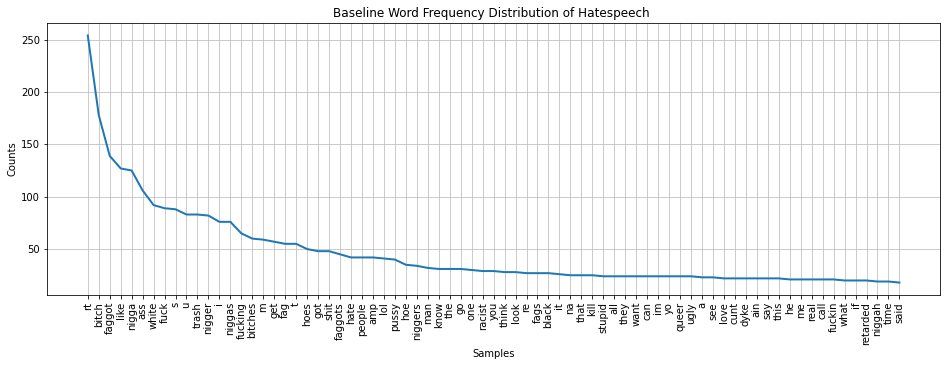

<AxesSubplot:title={'center':'Baseline Word Frequency Distribution of Hatespeech '}, xlabel='Samples', ylabel='Counts'>

In [11]:
freqdist = nltk.FreqDist(counter)
plt.figure(figsize=(16,5))
plt.title('Baseline Word Frequency Distribution of Hatespeech ')
freqdist.plot(75)

In [12]:
from wordcloud import WordCloud
from PIL import Image

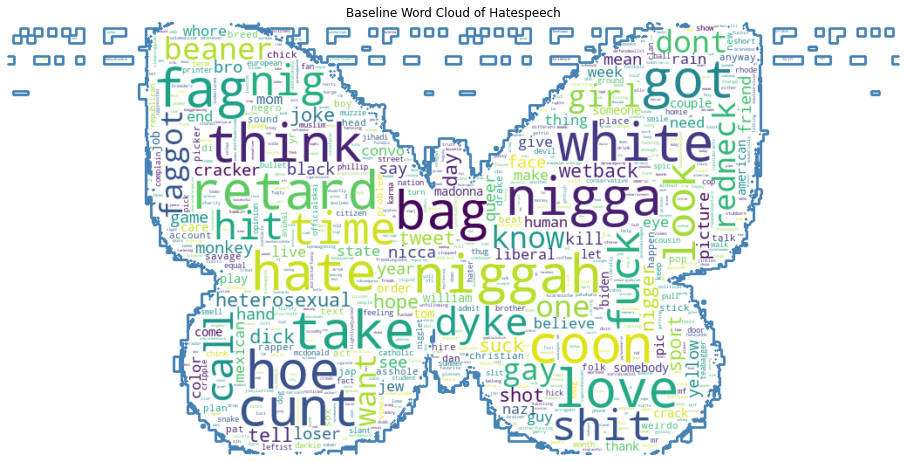

In [13]:
offensive_text = ' '.join(counter)
bad_mask = np.array(Image.open( "C:/Users/Dell/Desktop/yue.png"))
wordcloud = WordCloud(max_font_size=60, mask=bad_mask, contour_width=3, 
                      contour_color='steelblue', background_color="white", max_words=10000).generate(offensive_text)
plt.figure(figsize=(16,12))
# plot wordcloud in matplotlib
plt.imshow(wordcloud, interpolation="bilinear")
plt.title("Baseline Word Cloud of Hatespeech")
plt.axis("off")
plt.show()

In [14]:
df1 = pd.read_csv('C:\\Users\\Dell\\Desktop\\words.csv',
                   sep=',', 
                   header=None, 
                   names=['tweet', 'label'],
                   encoding='ISO-8859-1')

In [15]:
import string
import re
import os
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.stem import SnowballStemmer
type(df1)
stop_words = stopwords.words('english')
for w in ['My','I','We','it','It','you','You','rt','Rt']:
    stop_words.append(w)
stemmer = SnowballStemmer("english")
def remove_punctuation(test):
    no_punct = "".join([c for c in test if c not in string.punctuation])
    return no_punct
def remove_url(test):
    remove = "".join(c.lower() for c in re.sub(r'[a-z]*[:.]+\S+', " ", test) )
    return remove
def remove_number(test):
    remove = "".join(c if c.isalpha() else ' ' for c in test)
    return remove
def word_stemmer(test):
    stem = "".join([stemmer.stem(i) for i in test] )
    return stem
df1['text_split']=df1['tweet'].apply(lambda x:' '.join([word for word in  nltk.RegexpTokenizer(pattern=r'\s+',gaps=True).tokenize(x) if word not in (stop_words)]))
df1['text_url']=df1['text_split'].apply(lambda x:remove_url(x))
df1['text_clean']=df1['text_url'].apply(lambda x:remove_number(x))
df1['text_stem']=df1['text_clean'].apply(lambda x:word_stemmer(x))

df1['text_stem'].head()


0    rt  jen jen       old man white galaxy phone c...
1    rt  imdope gethigh   whackko man lame niggah f...
2                          fucking hate coon ahh uncle
3     joeylattime  mawson    americ  n thats rootin...
4                              hoe ass nigga          
Name: text_stem, dtype: object

In [16]:
import collections
from sklearn.model_selection import train_test_split
counter = collections.Counter()
maxlen = 0
for words in df1['text_stem']:
    words = [x.lower() for x in nltk.word_tokenize(words)]
    if len(words) > maxlen:
        maxlen = len(words)
    for word in words:    
        counter[word] += 1
print(maxlen)
print(counter)
print(words)

310
Counter({'rt': 1385, 's': 1227, 'bitch': 1045, 'like': 918, 'i': 897, 'women': 737, 't': 727, 'realdonaldtrump': 722, 'the': 718, 'm': 641, 'get': 605, 'people': 569, 'fuck': 547, 'sexist': 522, 'ass': 515, 'you': 480, 'white': 462, 'fucking': 456, 'u': 446, 'they': 424, 'would': 420, 'woman': 420, 'one': 402, 'mkr': 370, 'trump': 369, 'shit': 360, 'buildthatwall': 359, 'this': 352, 'illegal': 350, 'can': 346, 'a': 334, 'that': 334, 'know': 327, 'want': 325, 'it': 319, 'if': 309, 'not': 307, 'really': 295, 'call': 294, 'go': 292, 'got': 291, 'no': 290, 'and': 290, 'think': 289, 'fucktrump': 288, 'he': 287, 're': 286, 'trumpisatraitor': 282, 'men': 279, 'black': 274, 'what': 265, 'need': 262, 'see': 256, 'faggot': 254, 'stupid': 245, 'all': 245, 'amp': 245, 'stop': 244, 'hate': 231, 'nigga': 231, 'man': 228, 'n': 224, 'icc': 223, 'never': 219, 'cunt': 211, 'is': 211, 'whore': 207, 'take': 201, 'nigger': 199, 'let': 199, 'look': 197, 'don': 197, 'why': 197, 'girls': 195, 'pussy': 193

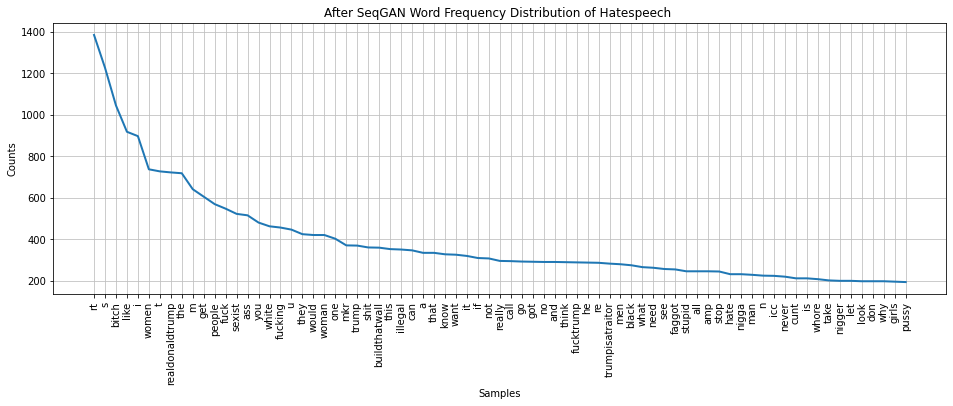

<AxesSubplot:title={'center':'After SeqGAN Word Frequency Distribution of Hatespeech '}, xlabel='Samples', ylabel='Counts'>

In [17]:
freqdist = nltk.FreqDist(counter)
plt.figure(figsize=(16,5))
plt.title('After SeqGAN Word Frequency Distribution of Hatespeech ')
freqdist.plot(75)

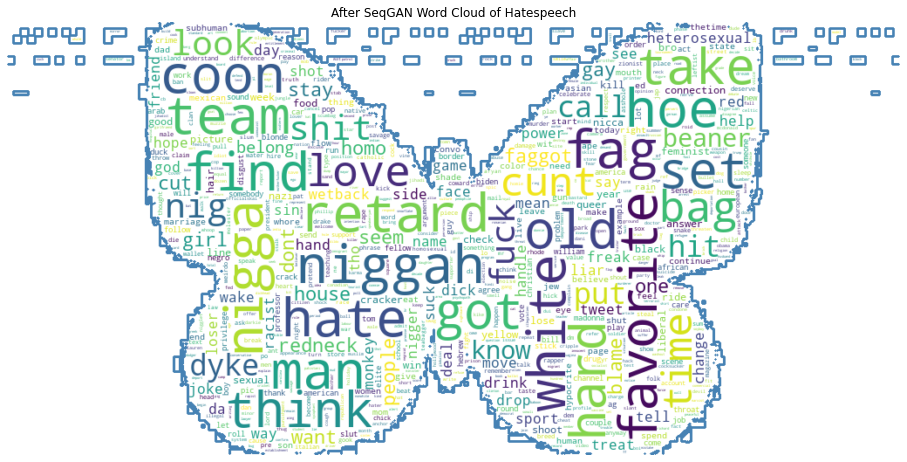

In [18]:
offensive_text = ' '.join(counter)
bad_mask = np.array(Image.open( "C:/Users/Dell/Desktop/yue.png"))
wordcloud = WordCloud(max_font_size=60, mask=bad_mask, contour_width=3, 
                      contour_color='steelblue', background_color="white", max_words=20000).generate(offensive_text)
plt.figure(figsize=(16,12))
# plot wordcloud in matplotlib
plt.imshow(wordcloud, interpolation="bilinear")
plt.title("After SeqGAN Word Cloud of Hatespeech")
plt.axis("off")
plt.show()